### Dependencies

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.4 * 2, 4.8 * 2)

### Load and visualize data

Extracting /Users/v-shmyhlo/Datasets/mnist/train-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/v-shmyhlo/Datasets/mnist/t10k-labels-idx1-ubyte.gz


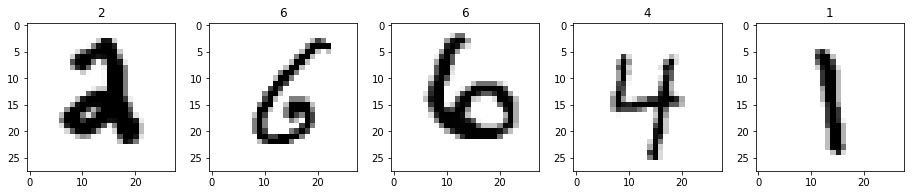

In [2]:
data_path = os.path.expanduser('~/Datasets/mnist')
mnist = input_data.read_data_sets(data_path, one_hot=True)

fig = plt.figure()

for n in range(5):
  i = np.random.randint(mnist.train.num_examples)
  a = fig.add_subplot(1, 5, n + 1)
  a.set_title(np.argmax(mnist.train.labels[i]))
  implot = plt.imshow(mnist.train.images[i].reshape(28, 28))
  implot.set_cmap('binary')

fig.tight_layout()
plt.show()

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.truncated_normal([784, 10], stddev=1.0 / math.sqrt(784.)))
b = tf.Variable(tf.constant(0.1, shape=[10]))

# manual loss calculation (numerically unstable)
# y = tf.nn.softmax(tf.matmul(x, W) + b)
# loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

y = tf.matmul(x, W) + b
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

learning_rate = tf.placeholder(tf.float32)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

steps = 150000
batch_size = 32
log_interval = 5000
lr = 0.03
for step in range(steps):
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  sess.run(train_step, feed_dict={x: batch_x, y_: batch_y, learning_rate: lr})

  if step % log_interval == 0:
    validation_loss, validation_accuracy = sess.run(
        (loss, accuracy),
        feed_dict={x: mnist.validation.images,
                   y_: mnist.validation.labels})
      
    print('progress: %.2f%%, validation loss: %f, validation accuracy: %.4f, learning rate: %.e' % 
          (step / steps * 100, validation_loss, validation_accuracy, lr))
    
    if validation_loss <= 0.26:
      lr = 0.003

test_accuracy = sess.run(
    accuracy, feed_dict={x: mnist.test.images,
                         y_: mnist.test.labels})
print('test accuracy: %f' % test_accuracy)

progress: 0.00%, validation loss: 2.390170, validation accuracy: 0.1298, learning rate: 3e-02
progress: 3.33%, validation loss: 0.313150, validation accuracy: 0.9132, learning rate: 3e-02
progress: 6.67%, validation loss: 0.288426, validation accuracy: 0.9216, learning rate: 3e-02
progress: 10.00%, validation loss: 0.280365, validation accuracy: 0.9224, learning rate: 3e-02
progress: 13.33%, validation loss: 0.273935, validation accuracy: 0.9230, learning rate: 3e-02
progress: 16.67%, validation loss: 0.270287, validation accuracy: 0.9254, learning rate: 3e-02
progress: 20.00%, validation loss: 0.268296, validation accuracy: 0.9248, learning rate: 3e-02
progress: 23.33%, validation loss: 0.266427, validation accuracy: 0.9268, learning rate: 3e-02
progress: 26.67%, validation loss: 0.263291, validation accuracy: 0.9272, learning rate: 3e-02
progress: 30.00%, validation loss: 0.262911, validation accuracy: 0.9276, learning rate: 3e-02
progress: 33.33%, validation loss: 0.261710, validati

### Visualize weights

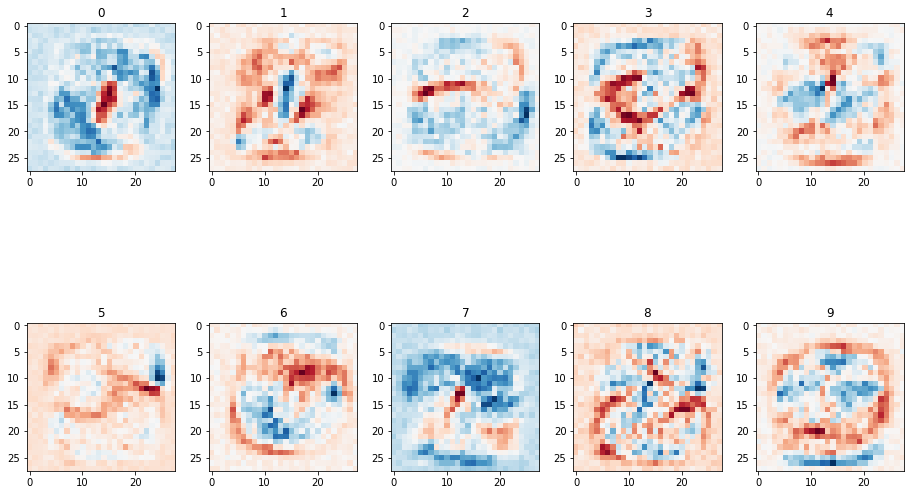

In [7]:
weights = sess.run(W)
fig = plt.figure()

for n in range(weights.shape[1]):
  a = fig.add_subplot(2, 5, n + 1)
  a.set_title(n)
  implot = plt.imshow(weights[:, n].reshape(28, 28))
  implot.set_cmap('RdBu')

fig.tight_layout()
plt.show()